In [2]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("US_Accidents_Cleaned.csv")


C:\Users\polep\AppData\Local\Temp\ipykernel_14384\1002797861.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Accidents_Cleaned.csv")


In [8]:

# Now df has no missing values and you can continue EDA
print(df.isna().sum())


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

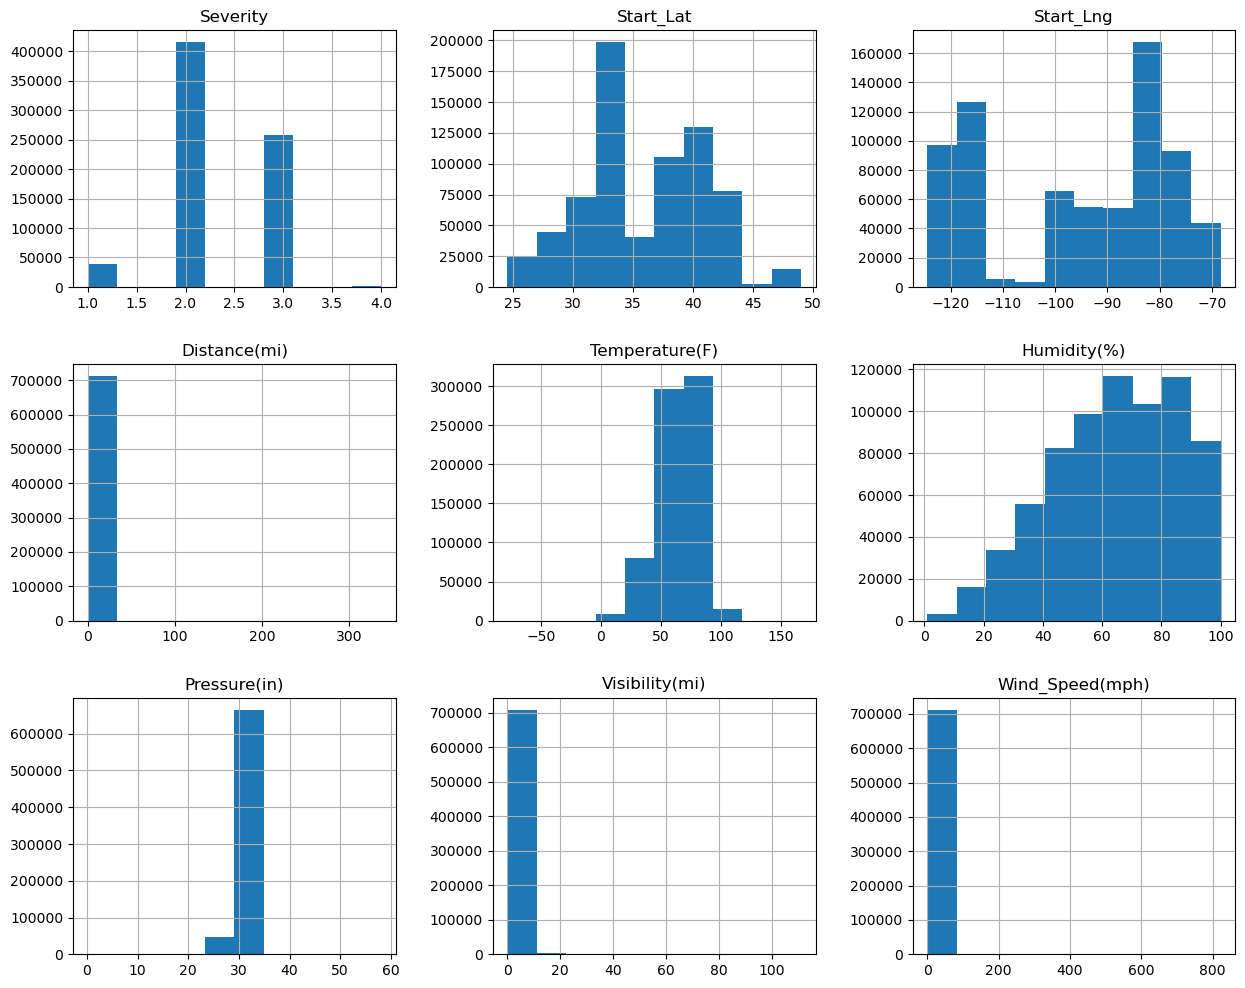

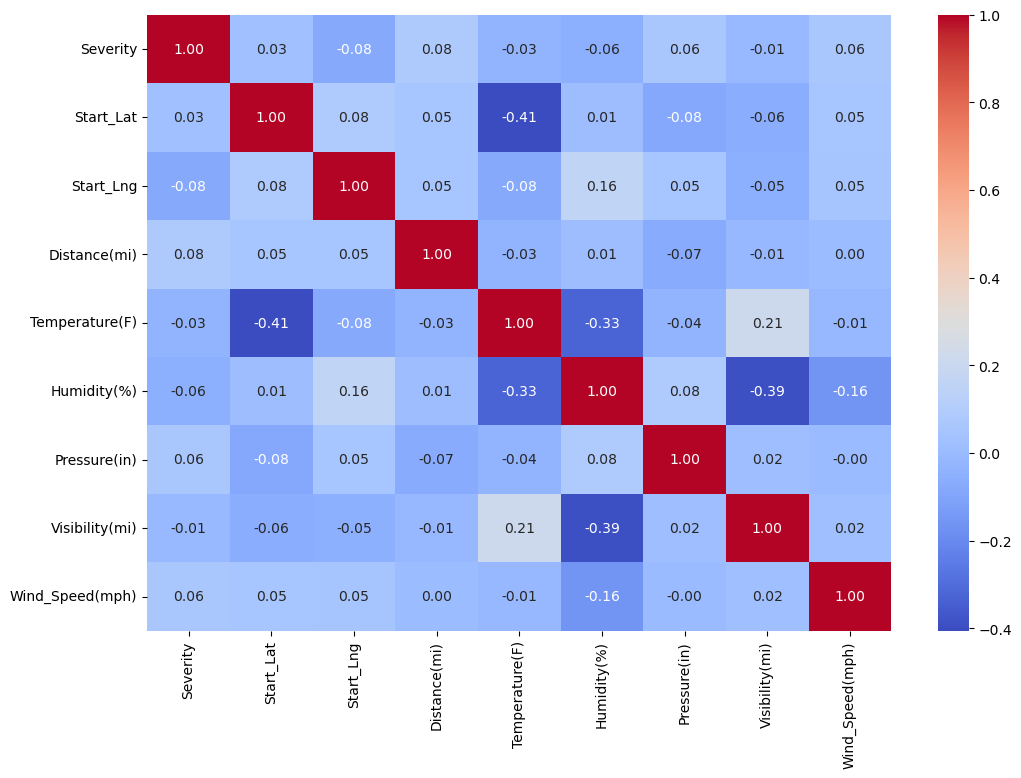

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64','int64']).columns
df[numerical_cols].hist(figsize=(15,12))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [ ]:
Geospatial and Location-Based Analysis

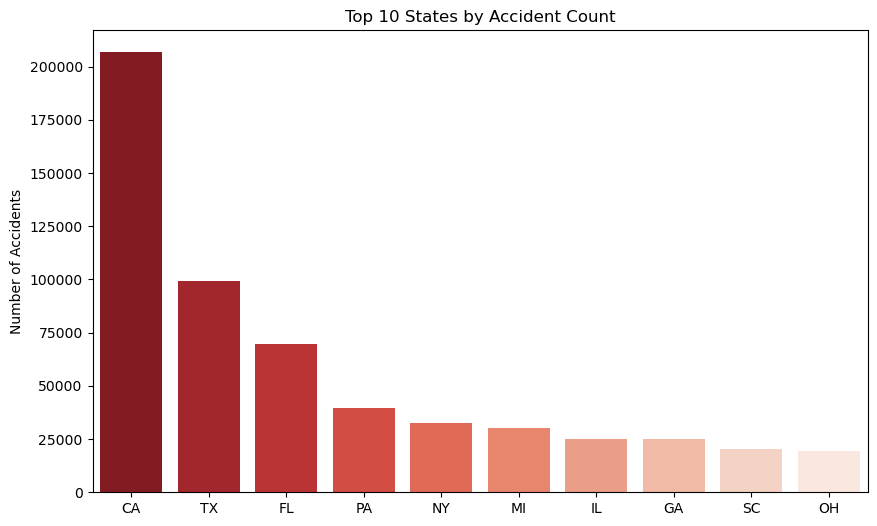

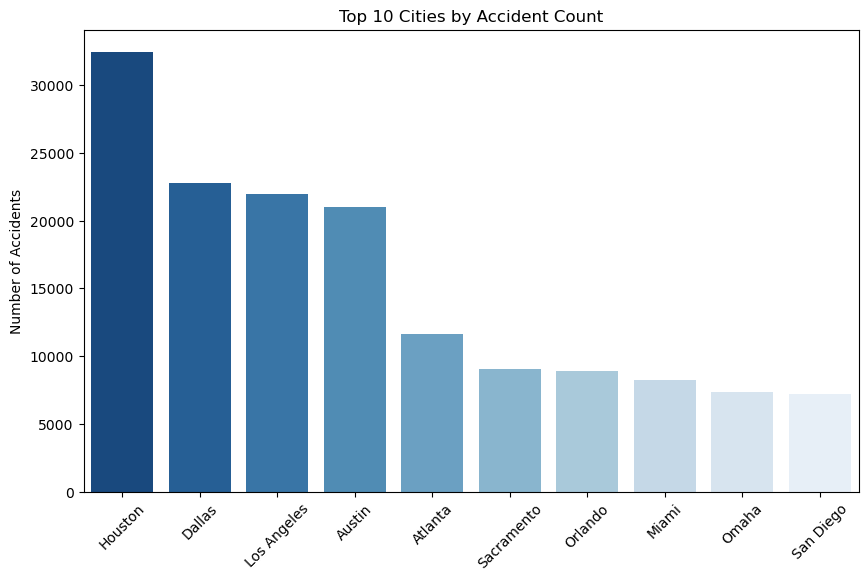

In [8]:
# Accidents per State
import matplotlib.pyplot as plt
import seaborn as sns
state_counts = df['State'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='Reds_r')
plt.title("Top 10 States by Accident Count")
plt.ylabel("Number of Accidents")
plt.show()

# Accidents per City (top 10)
city_counts = df['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Blues_r')
plt.title("Top 10 Cities by Accident Count")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


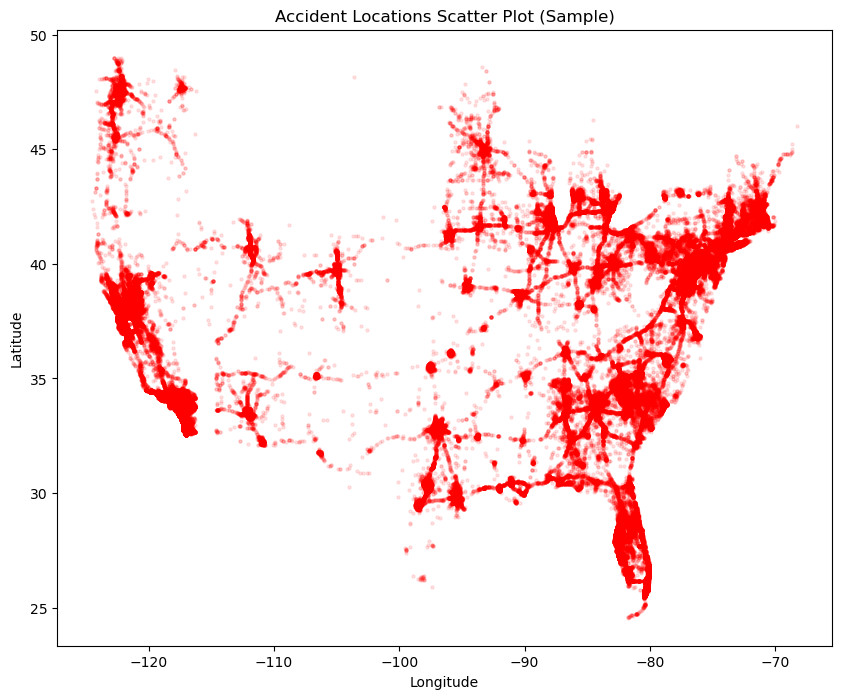

In [12]:
import matplotlib.pyplot as plt

# Drop rows with missing coordinates
geo_df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Sample for performance
sample_df = geo_df.sample(n=min(1000000, len(geo_df)), random_state=42)

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], alpha=0.1, s=5, c='red')
plt.title('Accident Locations Scatter Plot (Sample)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [14]:
top_5_states = state_counts.head(5)
top_5_cities = city_counts.head(5)

print("Top 5 Accident-Prone States:")
print(top_5_states)

print("\nTop 5 Accident-Prone Cities:")
print(top_5_cities)

Top 5 Accident-Prone States:
CA    206723
TX     99030
FL     69692
PA     39408
NY     32387
Name: State, dtype: int64

Top 5 Accident-Prone Cities:
Houston        32447
Dallas         22792
Los Angeles    21984
Austin         21034
Atlanta        11637
Name: City, dtype: int64


In [ ]:
EDA Q/A

In [ ]:
Q1. What is the distribution of accidents by Hour of the Day?

Accidents by Hour of the Day:
0      5753
1      4508
2      5226
3      4608
4     15112
5     19400
6     36488
7     60753
8     67026
9     44407
10    41239
11    40362
12    33466
13    31543
14    34389
15    35542
16    45803
17    48202
18    40911
19    33041
20    26818
21    17758
22    13527
23     6087
Name: Start_Hour, dtype: int64

Peak accident hour: 8:00 with 67026 accidents


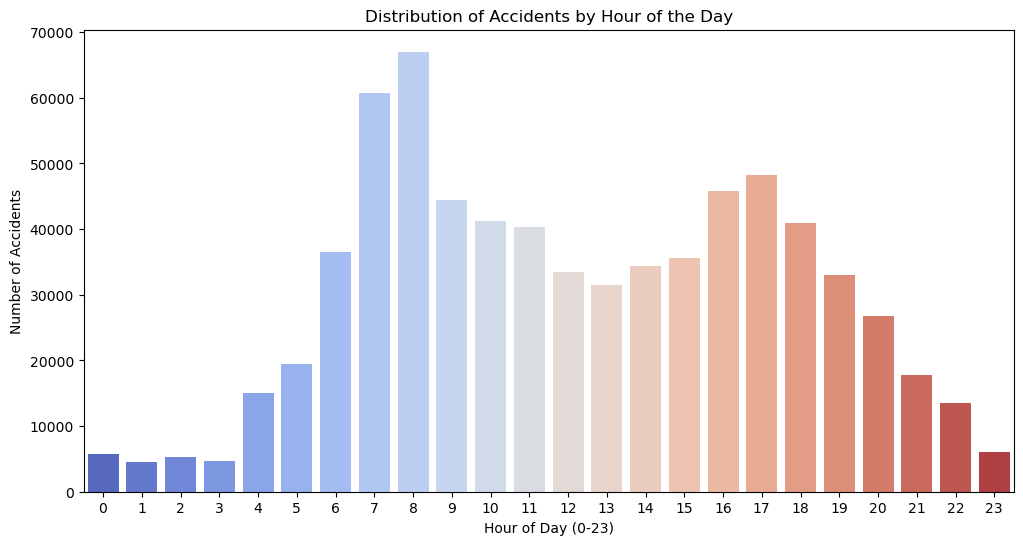

In [15]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

#  Extract Hour from Start_Time
df['Start_Hour'] = df['Start_Time'].dt.hour

#  Count accidents by hour
hour_counts = df['Start_Hour'].value_counts().sort_index()

# print counts
print("Accidents by Hour of the Day:")
print(hour_counts)

peak_hour = hour_counts.idxmax()
print(f"\nPeak accident hour: {peak_hour}:00 with {hour_counts.max()} accidents")

#  Plot distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Start_Hour', data=df, palette='coolwarm')
plt.title("Distribution of Accidents by Hour of the Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

In [ ]:
Q2. How does accident severity distribute across different States?

Accident counts by State and Severity:
Severity     1       2      3    4
State                             
AL         544    6214   1800   28
AR          26      82     85   17
AZ         658    2043   1041   12
CA        4610  111457  90531  125
CO         448     906   1499   43
CT          60    2085   3960   25
DC          99     561    234    0
DE         222     352     68    1
FL        4044   44544  20894  210
GA         604    8521  15545  132


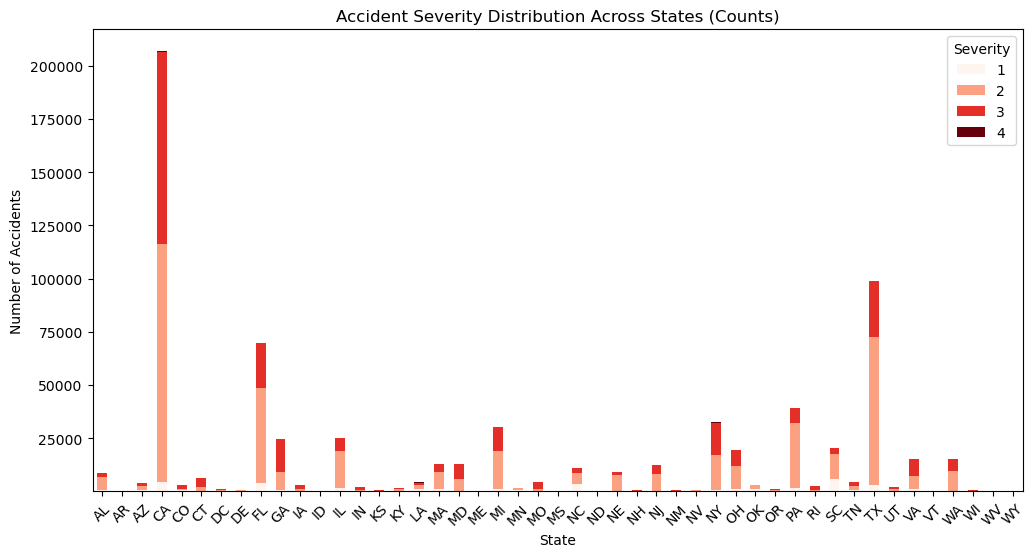

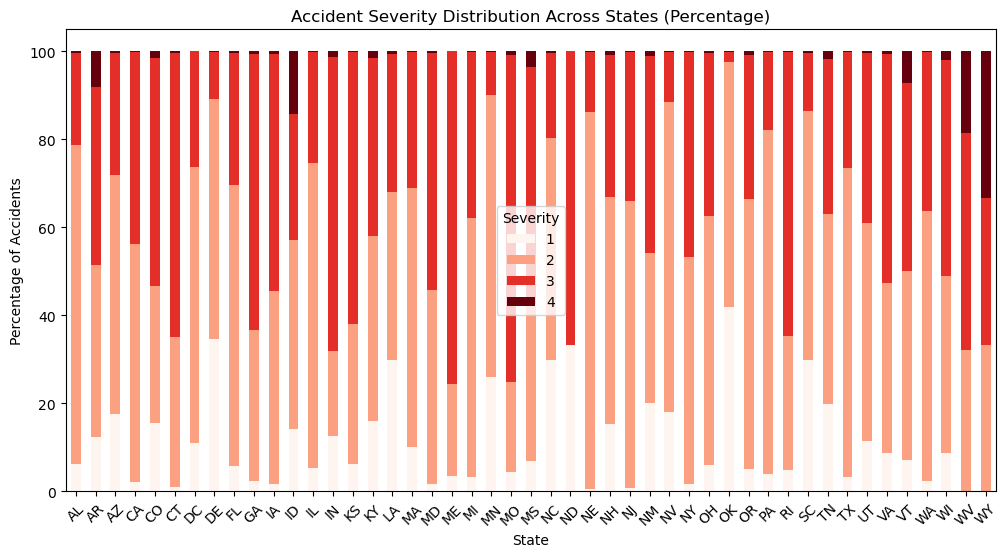

In [16]:
# Count accidents by State and Severity
severity_state_counts = df.groupby(['State', 'Severity']).size().unstack(fill_value=0)

print("Accident counts by State and Severity:")
print(severity_state_counts.head(10))  # show first 10 states

#  Optional: Normalize to see proportions per state
severity_state_percent = severity_state_counts.div(severity_state_counts.sum(axis=1), axis=0) * 100

#  Plot stacked bar chart (absolute counts)
severity_state_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Reds')
plt.title("Accident Severity Distribution Across States (Counts)")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity")
plt.xticks(rotation=45)
plt.show()

#  Plot stacked bar chart (percentage)
severity_state_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Reds')
plt.title("Accident Severity Distribution Across States (Percentage)")
plt.xlabel("State")
plt.ylabel("Percentage of Accidents")
plt.legend(title="Severity")
plt.xticks(rotation=45)
plt.show()

In [ ]:
Q3. What weather conditions are associated with the highest accident severity?

Top 10 Weather Conditions by Accident Severity:
Severity               1       2      3    4
Weather_Condition                           
Clear                727  140721  80712  121
Fair               20148   49740  30865  585
Mostly Cloudy       5842   53845  36494  232
Overcast              58   51713  28372   38
Partly Cloudy       4068   37484  25892  139
Scattered Clouds      33   29031  18437   38
Light Rain           909   15785  11645   86
Cloudy              4374   14052   8763  152
Haze                 144    3711   2997    5
Rain                 176    3219   2700   16


<Figure size 1200x600 with 0 Axes>

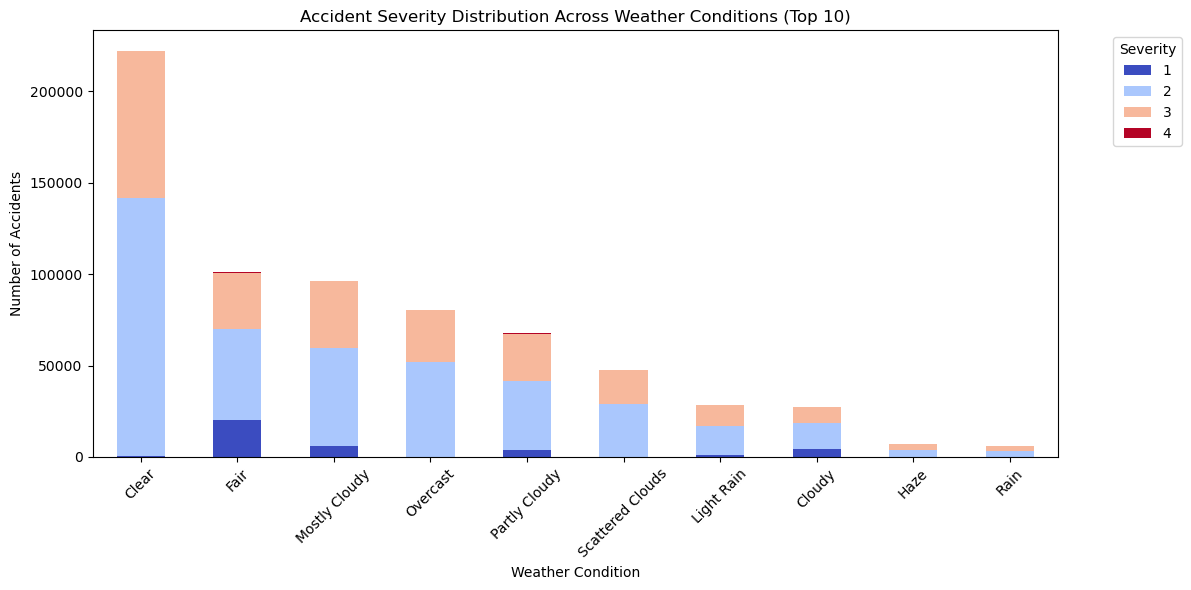

<Figure size 1200x600 with 0 Axes>

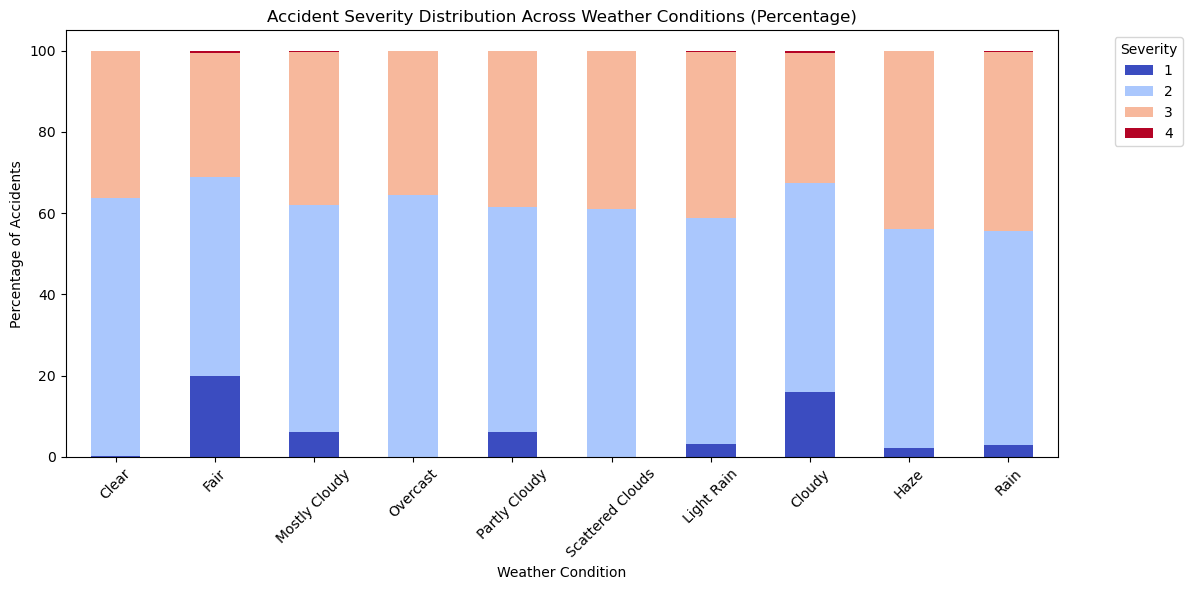

In [17]:
#  Count accidents by Weather_Condition and Severity
weather_severity_counts = df.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)

# Sort by total accidents per weather condition
weather_severity_counts = weather_severity_counts.loc[
    weather_severity_counts.sum(axis=1).sort_values(ascending=False).index
]

# Optional: Keep top 10 weather conditions for clarity
top_weather = weather_severity_counts.head(10)

#  Print table
print("Top 10 Weather Conditions by Accident Severity:")
print(top_weather)

#  Plot stacked bar chart (absolute counts)
plt.figure(figsize=(12,6))
top_weather.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title("Accident Severity Distribution Across Weather Conditions (Top 10)")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Optional: Percentage distribution per weather condition
top_weather_percent = top_weather.div(top_weather.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12,6))
top_weather_percent.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title("Accident Severity Distribution Across Weather Conditions (Percentage)")
plt.xlabel("Weather Condition")
plt.ylabel("Percentage of Accidents")
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Q4. How many accidents occur during day vs night? (Sunrise_Sunset column)

Unique values in Sunrise_Sunset column: ['Night' 'Day']

Number of Accidents during Day vs Night:
Day      531434
Night    180535
Name: Sunrise_Sunset, dtype: int64


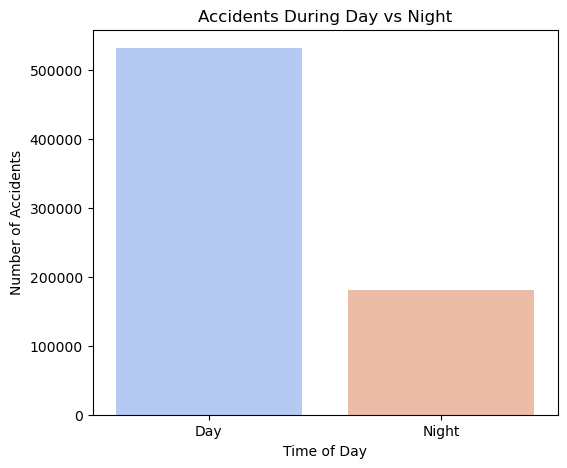


Percentage of Accidents during Day vs Night:
Day      74.642857
Night    25.357143
Name: Sunrise_Sunset, dtype: float64


In [19]:
#  Check unique values in Sunrise_Sunset
print("Unique values in Sunrise_Sunset column:", df['Sunrise_Sunset'].unique())

#  Count accidents during Day vs Night
day_night_counts = df['Sunrise_Sunset'].value_counts()
print("\nNumber of Accidents during Day vs Night:")
print(day_night_counts)

#  Plot distribution
plt.figure(figsize=(6,5))
sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')
plt.title("Accidents During Day vs Night")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

#  Optional: Percentage
day_night_percent = (day_night_counts / day_night_counts.sum()) * 100
print("\nPercentage of Accidents during Day vs Night:")
print(day_night_percent)

In [ ]:
Q5. Distribution of accidents on different days of the week

Accidents by Day of the Week:
Monday       119071
Tuesday      127701
Wednesday    129418
Thursday     129922
Friday       126106
Saturday      42201
Sunday        37550
Name: Day_of_Week, dtype: int64


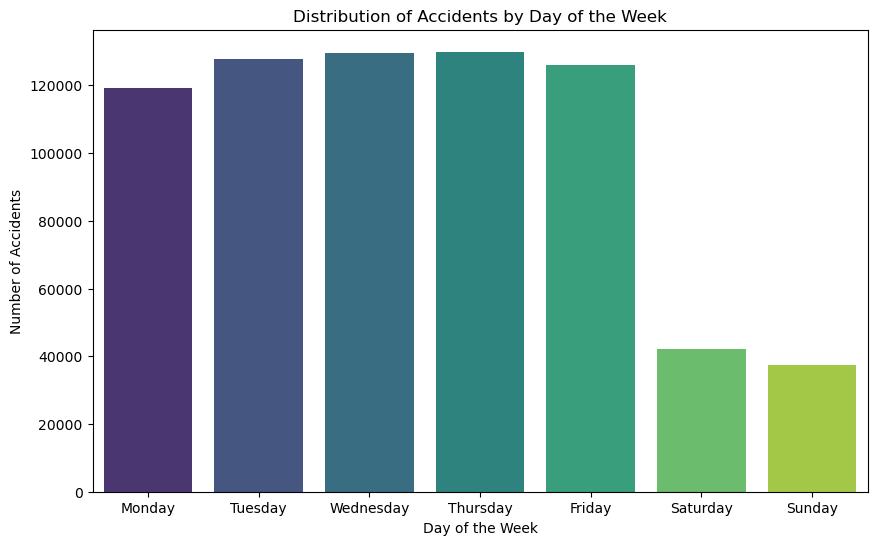

In [18]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract day of the week (Monday=0, Sunday=6)
df['Day_of_Week'] = df['Start_Time'].dt.day_name()  # Use .dt.day_name() for readable names

# Count accidents per day
day_counts = df['Day_of_Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Print counts
print("Accidents by Day of the Week:")
print(day_counts)

# Plot distribution
plt.figure(figsize=(10,6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title("Distribution of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

In [ ]:
Q6. Are certain traffic features (e.g., Traffic Signal, Stop, Crossing) associated with accident counts?

Accidents associated with traffic features (True only):
Traffic_Signal    156040
Crossing           94948
Junction           42400
Stop               21187
Give_Way            4551
Roundabout            21
dtype: int64


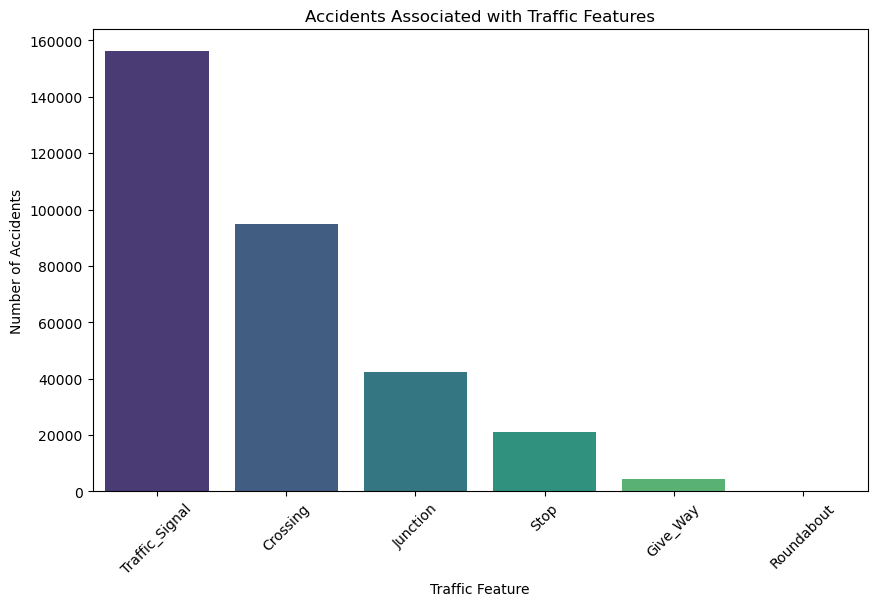

In [20]:
# List of traffic feature columns
traffic_features = ['Traffic_Signal', 'Stop', 'Crossing', 'Give_Way', 'Junction', 'Roundabout']

#  Count accidents for each traffic feature
traffic_counts = {}
for feature in traffic_features:
    counts = df[feature].value_counts()
    traffic_counts[feature] = counts.get(True, 0)  # Number of accidents where feature is True

traffic_counts = pd.Series(traffic_counts).sort_values(ascending=False)

#  Print accident counts by traffic feature
print("Accidents associated with traffic features (True only):")
print(traffic_counts)

#  Plot distribution
plt.figure(figsize=(10,6))
sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette='viridis')
plt.title("Accidents Associated with Traffic Features")
plt.xlabel("Traffic Feature")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()
